# Bike Sharing Demand

### 목표
워싱턴 D.C 소재의 자전거 대여 스타트업 Capital Bikeshare의 데이터를 활용하여, 특정 시간대에 얼마나 많은 사람들이 자전거를 대여하는지 예측하는 것

### 데이터 구성

* **datetime** - 시간. 연-월-일 시:분:초 로 표현 

* **season** - 계절. 봄(1), 여름(2), 가을(3), 겨울(4) 순으로 표현 

* **holiday** - 1이면 공휴일이며, 0이면 공휴일이 아님 

* **workingday** - 1이면 근무일이며, 0이면 근무일이 아님 

* **weather** - 날씨. 1 ~ 4 사이의 값을 가지며, 구체적으로는 다음과 같음 

```
         1: 아주 깨끗한 날씨. 또는 아주 약간의 구름이 끼어있음
         2: 약간의 안개와 구름이 끼어있는 날씨
         3: 약간의 눈, 비가 오거나 천둥이 침
         4: 아주 많은 비가 오거나 우박이 내림

```
 
* **temp** - 온도. 섭씨(Celsius)로 적혀있음 

* **atemp** - 체감 온도. 마찬가지로 섭씨(Celsius)로 적혀있음 

* **humidity** - 습도

* **windspeed** - 풍속 

* **casual** - 비회원(non-registered)의 자전거 대여량 

* **registered** - 회원(registered)의 자전거 대여량

* **count** - 총 자전거 대여랑

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#datetime을 날짜로 해석하기 위해 parse_dates 옵션에 추가
train = pd.read_csv('./train.csv', parse_dates=["datetime"])
test = pd.read_csv('./test.csv', parse_dates=["datetime"])
submission = pd.read_csv('./sampleSubmission.csv', parse_dates=["datetime"])

In [2]:
train.shape, test.shape

((10886, 12), (6493, 9))

In [3]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [4]:
test.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed'],
      dtype='object')

In [5]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [6]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [7]:
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


### 데이터 전처리

* 날짜 컬럼을 사용하기 위해, 머신러닝이 이해할 수 있도록 전처리 

In [9]:
# train : 연, 월, 일, 시, 분, 초
train["year"] = train["datetime"].dt.year
train["month"] = train["datetime"].dt.month
train["day"] = train["datetime"].dt.day
train["hour"] = train["datetime"].dt.hour
train["minute"] = train["datetime"].dt.minute
train["second"] = train["datetime"].dt.second

In [10]:
# train : 요일 - 0(월), 1(화), 2(수), 3(목), 4(금), 5(토), 6(일)
train["weekday"] = train["datetime"].dt.dayofweek

In [11]:
train.head(1)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,weekday
0,2011-01-01,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0,5


In [12]:
# train : 요일 이름 지정
train.loc[train["weekday"] == 0, "dayofweek"] = "Monday"
train.loc[train["weekday"] == 1, "dayofweek"] = "Tuesday"
train.loc[train["weekday"] == 2, "dayofweek"] = "Wednesday"
train.loc[train["weekday"] == 3, "dayofweek"] = "Thursday"
train.loc[train["weekday"] == 4, "dayofweek"] = "Friday"
train.loc[train["weekday"] == 5, "dayofweek"] = "Saturday"
train.loc[train["weekday"] == 6, "dayofweek"] = "Sunday"

In [13]:
train["weekday"] = train["datetime"].dt.dayofweek

In [14]:
train.head(1)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,weekday,dayofweek
0,2011-01-01,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0,5,Saturday


In [15]:
# test : 연, 월, 일, 시, 분, 초
test["year"] = test["datetime"].dt.year
test["month"] = test["datetime"].dt.month
test["day"] = test["datetime"].dt.day
test["hour"] = test["datetime"].dt.hour
test["minute"] = test["datetime"].dt.minute
test["second"] = test["datetime"].dt.second

In [16]:
# test : 요일 - 0(월), 1(화), 2(수), 3(목), 4(금), 5(토), 6(일)
test["weekday"] = test["datetime"].dt.dayofweek

In [17]:
test.head(1)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,minute,second,weekday
0,2011-01-20,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,0,0,0,3


In [18]:
# test : 요일 이름 지정
test.loc[test["weekday"] == 0, "dayofweek"] = "Monday"
test.loc[test["weekday"] == 1, "dayofweek"] = "Tuesday"
test.loc[test["weekday"] == 2, "dayofweek"] = "Wednesday"
test.loc[test["weekday"] == 3, "dayofweek"] = "Thursday"
test.loc[test["weekday"] == 4, "dayofweek"] = "Friday"
test.loc[test["weekday"] == 5, "dayofweek"] = "Saturday"
test.loc[test["weekday"] == 6, "dayofweek"] = "Sunday"

In [19]:
test.head(1)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,minute,second,weekday,dayofweek
0,2011-01-20,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,0,0,0,3,Thursday


## 데이터 탐색 

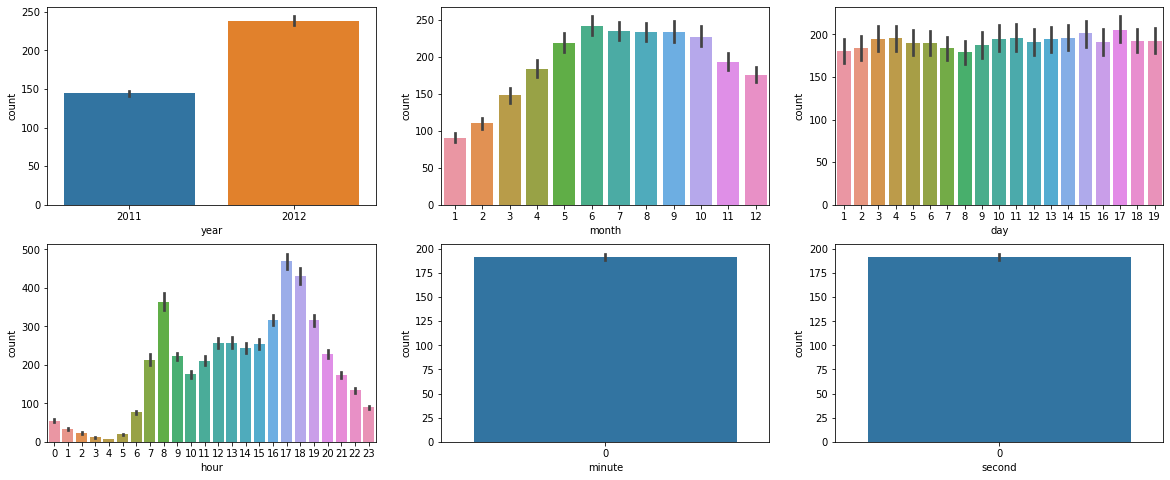

In [20]:
# 연, 월, 일, 시, 분, 초에 따른 자전거 대여량
figure, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3)

figure.set_size_inches(20, 8)

sns.barplot(data=train, x="year", y="count", ax=ax1)
sns.barplot(data=train, x="month", y="count", ax=ax2)
sns.barplot(data=train, x="day", y="count", ax=ax3)
sns.barplot(data=train, x="hour", y="count", ax=ax4)
sns.barplot(data=train, x="minute", y="count", ax=ax5)
sns.barplot(data=train, x="second", y="count", ax=ax6)
plt.show()


* year : 2011년보다 2012년의 자전거 대여량이 더 많다.
* month : 겨울은 다른 계절에 비해 자전거 대여량이 많지 않음.
* day : x축이 1일부터 19일까지만 나타남. 20일 이후는 test 데이터셋에 있음.
* hour : 출근 시간과 퇴근 시간에 자전거 대여량이 많음.
* minute / second : x축이 0인 것을 보아 분과 초는 기록되고 있지 않은 것을 알 수 있음.


In [21]:
# 연, 월을 문자열로 변환
train["year(str)"] = train["year"].astype('str')
train["month(str)"] = train["month"].astype('str')

In [22]:
# 연, 월을 결합
train["year_month"] = train["year(str)"] + "-" + train["month(str)"]
train.head(1)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,month,day,hour,minute,second,weekday,dayofweek,year(str),month(str),year_month
0,2011-01-01,1,0,0,1,9.84,14.395,81,0.0,3,...,1,1,0,0,0,5,Saturday,2011,1,2011-1


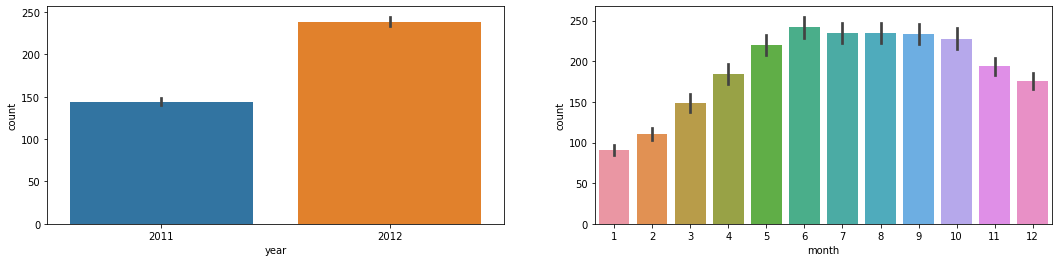

In [23]:
# 연, 월에 따른 자전거 대여량
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)

figure.set_size_inches(18, 4)

sns.barplot(data=train, x="year", y="count", ax=ax1)
sns.barplot(data=train, x="month", y="count", ax=ax2)
plt.show()

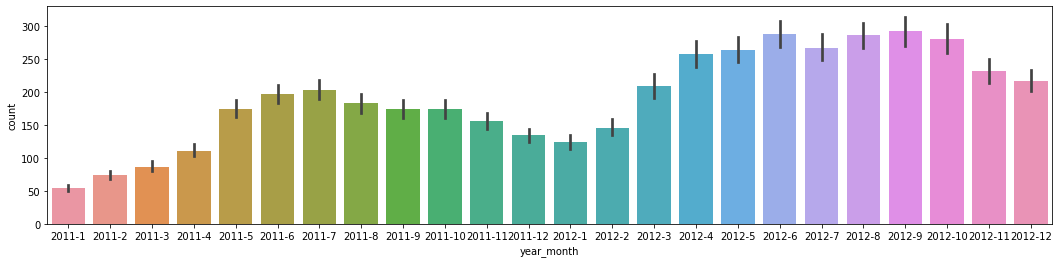

In [24]:
# 연, 월(연, 월 결합)에 따른 자전거 대여량
figure, ax3 = plt.subplots(nrows=1, ncols=1)

figure.set_size_inches(18, 4)

sns.barplot(data=train, x="year_month", y="count", ax=ax3)
plt.show()

* 2011년 1월부터 2012년 12월까지 자전거 대여량은 꾸준히 증가하는 추세.
* 이로 인해 월별 시각화에서는 같은 겨울이라도 12월에 대여량이 더욱 많은 것으로 나타남.
* 이는 머신러닝 알고리즘에서 과적합될 소지가 있으므로, month 칼럼은 사용하지 않겠음.

[Text(0.5, 1.0, 'Box Plot On Count Across Working Day')]

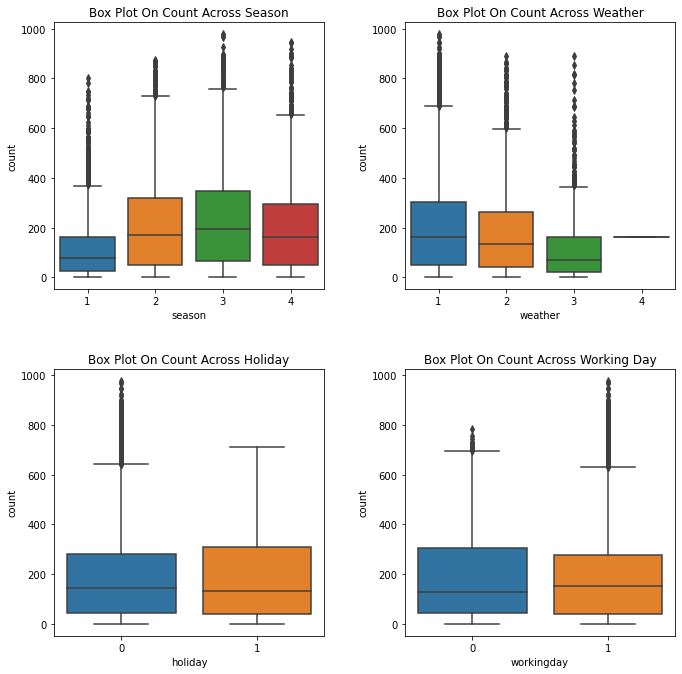

In [25]:
# 박스플롯
figure, axes = plt.subplots(nrows=2, ncols=2) # 2행 2열
plt.tight_layout()
figure.set_size_inches(10, 10)

# 서브플롯 할당
# 계절, 날씨, 공휴일, 근무일별 대여 수량 박스플롯
sns.boxplot(x='season', y='count', data=train, ax=axes[0, 0])
sns.boxplot(x='weather', y='count', data=train, ax=axes[0, 1])
sns.boxplot(x='holiday', y='count', data=train, ax=axes[1, 0])
sns.boxplot(x='workingday', y='count', data=train, ax=axes[1, 1])

# 서브플롯에 제목 달기
axes[0, 0].set(title='Box Plot On Count Across Season')
axes[0, 1].set(title='Box Plot On Count Across Weather')
axes[1, 0].set(title='Box Plot On Count Across Holiday')
axes[1, 1].set(title='Box Plot On Count Across Working Day')

* 계절별 대여 수량 : 자전거 대여 수량은 봄에 가장 적고, 가을에 가장 많음.
* 날씨별 대여 수량 : 날씨가 좋을 때 가장 대여 수량이 많고, 안 좋을수록 수량이 적음.
* 공휴일 여부에 따른 대여 수량 : 공휴일일 때와 아닐 때 자전거 대여 수량의 중앙값은 거의 비슷함. 다만 공휴일이 아닐 때는 이상치가 많음.
* 근무일 여부에 따른 대여 수량 : 근무일일 때와 아닐 때 자전거 대여 수량의 중앙값은 거의 비슷함. 다만 근무일일 때 이상치가 많음.


<AxesSubplot:xlabel='hour', ylabel='count'>

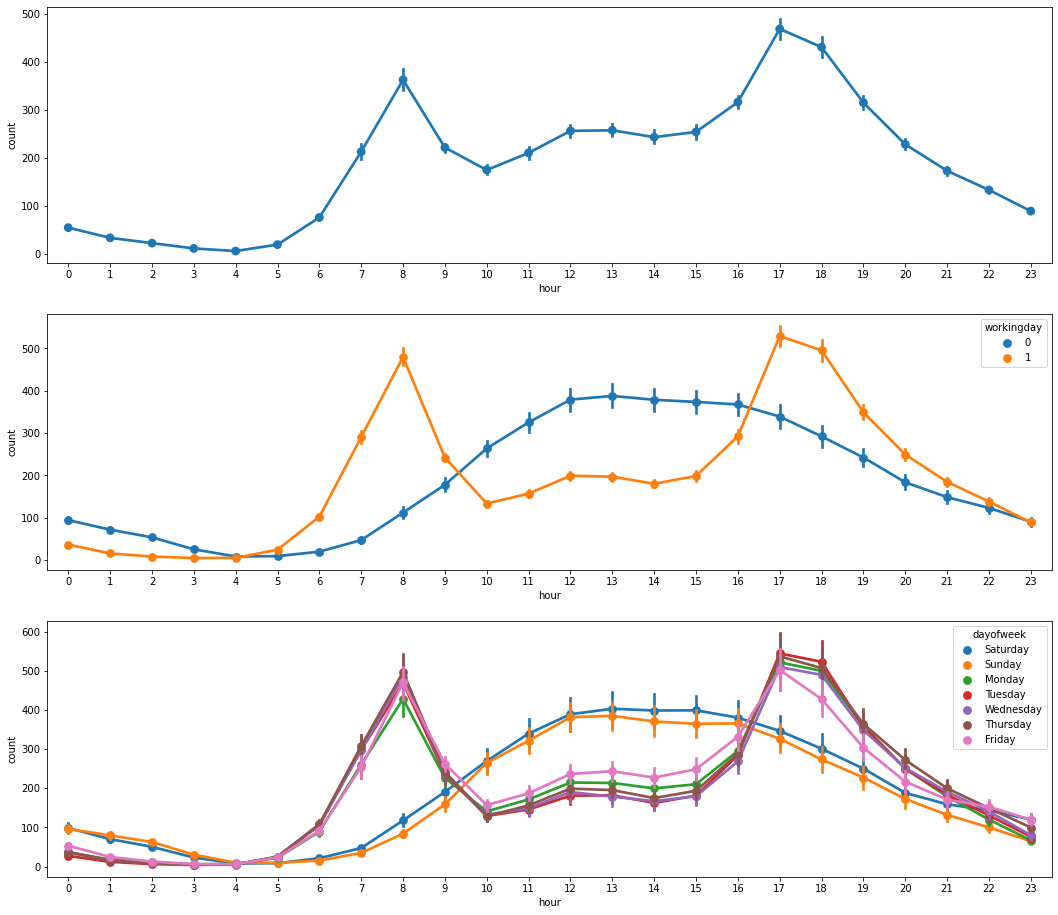

In [26]:
# 포인트플롯
figure, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1)

figure.set_size_inches(18, 16)

# 시간별 자전거 대여량
sns.pointplot(data=train, x="hour", y="count", ax=ax1)

# 시간별 자전거 대여량, hue='workingday'
sns.pointplot(data=train, x="hour", y="count", hue="workingday", ax=ax2)

# 시간별 자전거 대여량, hue='dayofweek'
sns.pointplot(data=train, x="hour", y="count", hue="dayofweek", ax=ax3)

* 출근 시간과 퇴근 시간에 자전거 대여량이 많음.
* 평일과 휴일로 구분했을 때, 휴일인 경우에는 오후 시간에 자전거 대여량이 많음.
* 금요일은 다른 요일보다 토요일, 일요일에 가까운 특성을 보임.
* 대체적으로 토요일보다는 일요일에 자전거 대여량이 적음.
* dayofweek(weekday)는 머신러닝 알고리즘에서 좋은 성능을 내는 데 도움을 줄 것으로 보임.

## 데이터 분리하기
* Feature : season, holiday, workingday, weather, temp, atemp, humidity, windspeed, year, hour, weekday
* Label : count

In [27]:
# 피쳐 선택
feature_names = ["season", "holiday", "workingday", "weather",
                 "temp", "atemp", "humidity", "windspeed",
                 "year", "hour", "weekday"]
feature_names

['season',
 'holiday',
 'workingday',
 'weather',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'year',
 'hour',
 'weekday']

In [28]:
# 라벨 지정
label_name = "count"
label_name

'count'

In [29]:
X_train = train[feature_names]
X_test = test[feature_names]
y_train = train[label_name]

## Decision Tree

In [30]:
from sklearn.tree import DecisionTreeRegressor

In [31]:
# DecisionTreeRegressor
tree = DecisionTreeRegressor(random_state = 42) 
tree

DecisionTreeRegressor(random_state=42)

## Random Forest

In [32]:
from sklearn.ensemble import RandomForestRegressor

In [33]:
# RandomForestRegressor
# 1) n_jobs : -1을 대입하면 컴퓨터에 존재하는 모든 코어 전부 활용.
# 2) random_state. 랜덤포레스트의 결과가 랜덤하게 나오는 것을 고정하는 옵션.
model = RandomForestRegressor(n_jobs=-1, random_state=42)
model

RandomForestRegressor(n_jobs=-1, random_state=42)

## Validation

In [34]:
from sklearn.model_selection import cross_val_predict

In [35]:
# cross_val_predict
y_predict_tree = cross_val_predict(tree, X_train, y_train, cv=20)

print(y_predict_tree.shape)
y_predict_tree[:5]

(10886,)


array([19., 25., 24.,  2.,  3.])

In [36]:
# cross_val_predict
y_predict_model = cross_val_predict(model, X_train, y_train, cv=20)

print(y_predict_model.shape)
y_predict_model[:5]

(10886,)


array([28.39      , 24.02      , 21.2       , 11.31666667,  4.44      ])

## Evaluate

In [37]:
import numpy as np

In [38]:
from sklearn.metrics import mean_squared_log_error

In [39]:
# Decision Tree
# mean_squared_log_error에 y_predict와 y_train을 넣어 MSLE를 계산
msle = mean_squared_log_error(y_predict_tree, y_train)

# 루트를 씌워 rmsle 계산
score = np.sqrt(msle)

# score 변수에 할당한 점수를 출력
print("Score = {0:.5f}".format(score))

Score = 0.48831


In [40]:
# Random Forest
# mean_squared_log_error에 y_predict와 y_train을 넣어 MSLE를 계산
msle = mean_squared_log_error(y_predict_model, y_train)

# 루트를 씌워 rmsle 계산
score = np.sqrt(msle)

# score 변수에 할당한 점수를 출력
print("Score = {0:.5f}".format(score))

Score = 0.38237


## Fit, Predict

In [41]:
model.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [42]:
predictions = model.predict(X_test)

[Text(0.5, 1.0, 'test')]

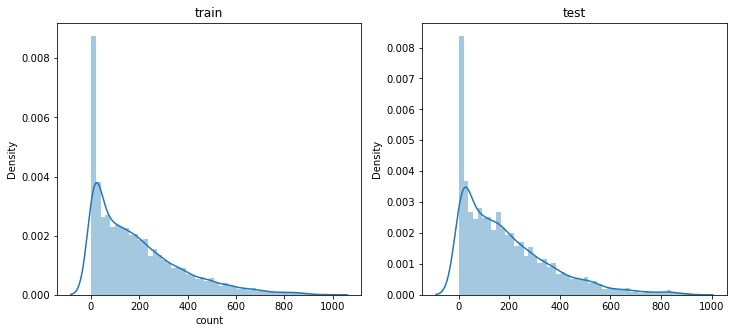

In [43]:
# 예측한 데이터 시각화
fig,(ax1,ax2)= plt.subplots(ncols=2)
fig.set_size_inches(12,5)
sns.distplot(y_train,ax=ax1,bins=50)
ax1.set(title="train")
sns.distplot(predictions,ax=ax2,bins=50)
ax2.set(title="test")

## Submit 

In [44]:
submission = pd.read_csv("./sampleSubmission.csv")

In [45]:
submission["count"] = predictions

In [46]:
submission.to_csv("submission.csv", index=False)